Imports

In [1]:
%run Data_Analysis_Functions.ipynb

#### Read all files and check the dfs

In [2]:
folder = "\Archive_21"
#folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv").sort_index(axis=1)
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv").sort_index(axis=1)
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv").sort_index(axis=1)
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv").sort_index(axis=1)
bank = pd.read_csv(f"..\Datalogs{folder}\Bank.csv").sort_index(axis=1)

Get sums and averages for each timestep

In [28]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

# Get id of households who are firm owners
firm_owner_ids = households[(households['date'] == 0) & (households['firm_owner'] == 1)]['id'].tolist()
# Separate households into workers or firm owners
households_workers = households[~households['id'].isin(firm_owner_ids)]
households_owners = households[households['id'].isin(firm_owner_ids)]

# selects worker or firm owner households
households_workers_avg = households_workers.groupby('date').mean().reset_index()
households_workers_sum = households_workers.groupby('date').sum().reset_index()
households_owners_avg = households_owners.groupby('date').mean().reset_index()
households_owners_sum = households_owners.groupby('date').sum().reset_index()

Calculate number of agents

In [29]:
mask = households['date'].apply(lambda x: np.isnan(x) if isinstance(x, float) else False)

# filter dataframe using mask
filtered_df = households[mask]

timestep = int(households['date'].max())
#timestep = 15
n_households = households[households.date == 0].shape[0]
n_cons_firms = cons_firms[cons_firms.date == 0].shape[0]
n_cap_firms = cap_firms[cap_firms.date == 0].shape[0]
t = np.linspace(0,timestep, timestep +1)

In [30]:
print(f"Program has {n_households} households, {n_cons_firms} consumer firms, {n_cap_firms} capital firms, and runs for {timestep} timesteps")

Program has 100000 households, 4500 consumer firms, 500 capital firms, and runs for 60 timesteps


Calculate aggregate data from sector columns

 "actual_spending_on_sector", "inventory_by_sector_", "offsets_sold_by_sector_", "planned_production_on_sector",
                "planned_spending_on_sector", "quantity_sold_by_sector", "total_cons_emissions_by_sector_","actual_production_on_sector",

In [53]:
# select columns in public board starting with "actual_spending_on_sector"
actual_spending = pboard.filter(regex='actual_spending_on_sector')
# sum up all the values in these columns and assign this to the column "total_actual_spending"
pboard['total_actual_spending'] = actual_spending.sum(axis=1)

# planned_spending_on_sector
planned_spending = pboard.filter(regex='planned_spending_on_sector')
pboard['total_planned_spending'] = planned_spending.sum(axis=1)

# do the same above for inventory_by_sector
inventory = pboard.filter(regex='inventory_by_sector')
pboard['total_inventory'] = inventory.sum(axis=1)

# planned_production_on_sector
planned_production = pboard.filter(regex='planned_production_on_sector')
pboard['total_planned_production'] = planned_production.sum(axis=1)
# actual_production_on_sector
actual_production = pboard.filter(regex='actual_production_on_sector')
pboard['total_actual_production'] = actual_production.sum(axis=1)

# quantity_sold_by_sector
quantity_sold = pboard.filter(regex='quantity_sold_by_sector')
pboard['total_quantity_sold'] = quantity_sold.sum(axis=1)

# total_cons_emissions_by_sector
total_cons_emissions = pboard.filter(regex='total_cons_emissions_by_sector')
pboard['total_cons_emissions'] = total_cons_emissions.sum(axis=1)
# offsets_sold_by_sector
offsets_sold = pboard.filter(regex='offsets_sold_by_sector')
pboard['total_offsets_sold'] = offsets_sold.sum(axis=1)



<Axes: >

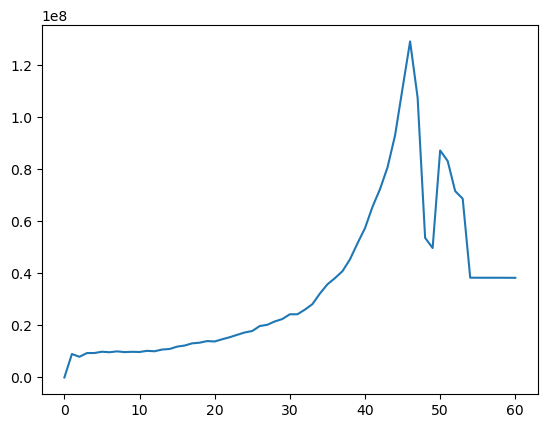

## Plot the data

#### See which columns are present

In [31]:
print(households.columns)
print(cons_firms.columns)
print(cap_firms.columns)
print(pboard.columns)
print(bank.columns)

Index(['c_excess_money', 'c_f', 'consumption_budget', 'consumption_propensity',
       'date', 'emission_sensitivity_avg', 'firm_owner', 'id',
       'income_average', 'income_current', 'income_dividend',
       'income_unemployment_benefit', 'income_wage', 'reservation_wage',
       'saving_propensity', 'saving_propensity_optimist',
       'saving_propensity_pessimist', 'savings', 'savings_desired',
       'sentiment', 'total_emissions', 'unemp_duration',
       'unemp_duration_upper_bound', 'unemployed'],
      dtype='object')
Index(['Leverage_ratio', 'Total_assets', 'active_job_postings',
       'average_profit', 'average_sale_quantity', 'bankrupt', 'capital_costs',
       'cash_on_hand', 'date', 'debt_interest_payments',
       'debt_principal_payments', 'desired_empl_count', 'desired_inventory',
       'desired_machines', 'dividend_payments', 'dividend_ratio',
       'dividend_ratio_optimistic', 'dividend_ratio_pessimistic',
       'expected_wage_bill', 'good_price_current', 'id',

### Plot Households

Worker households

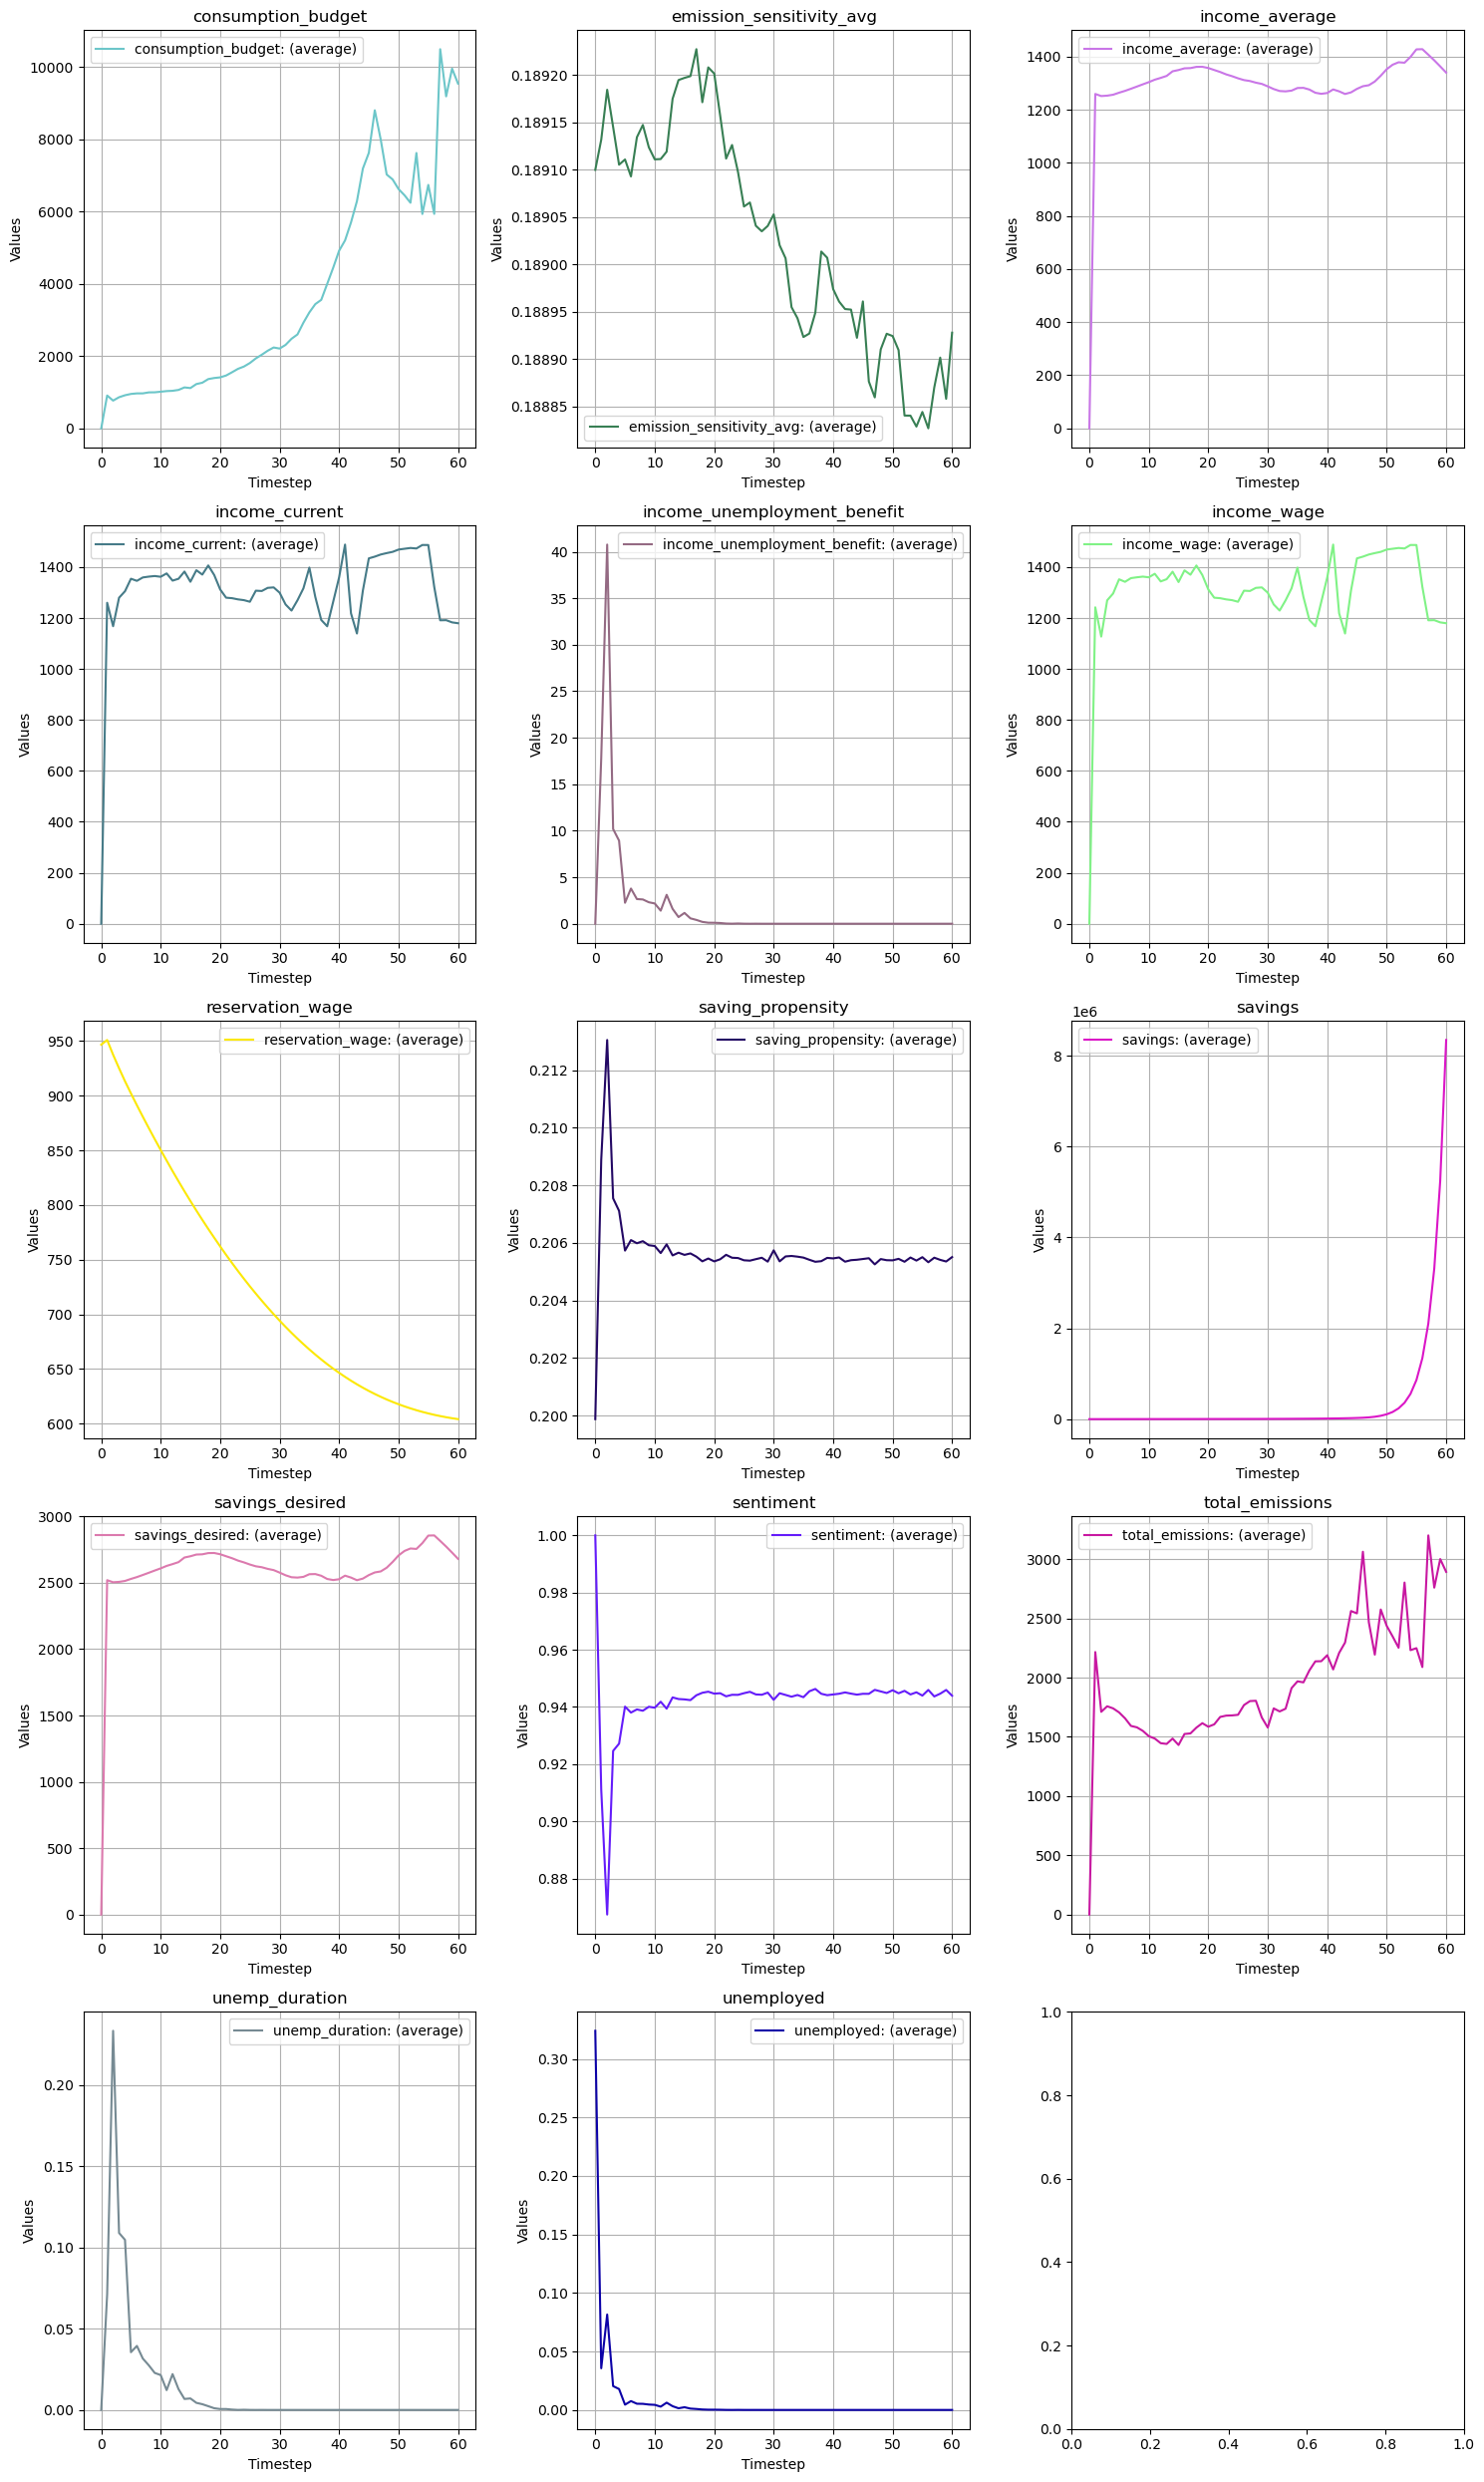

In [36]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_excess_money", "consumption_propensity", 
                   "saving_propensity_optimist", "saving_propensity_pessimist", 
                    "firm_owner", "income_dividend",
                    "unemp_duration_upper_bound", "id"] 
plot_values(households_workers_avg,t,True, cols_to_exclude)

All original Firm owners 

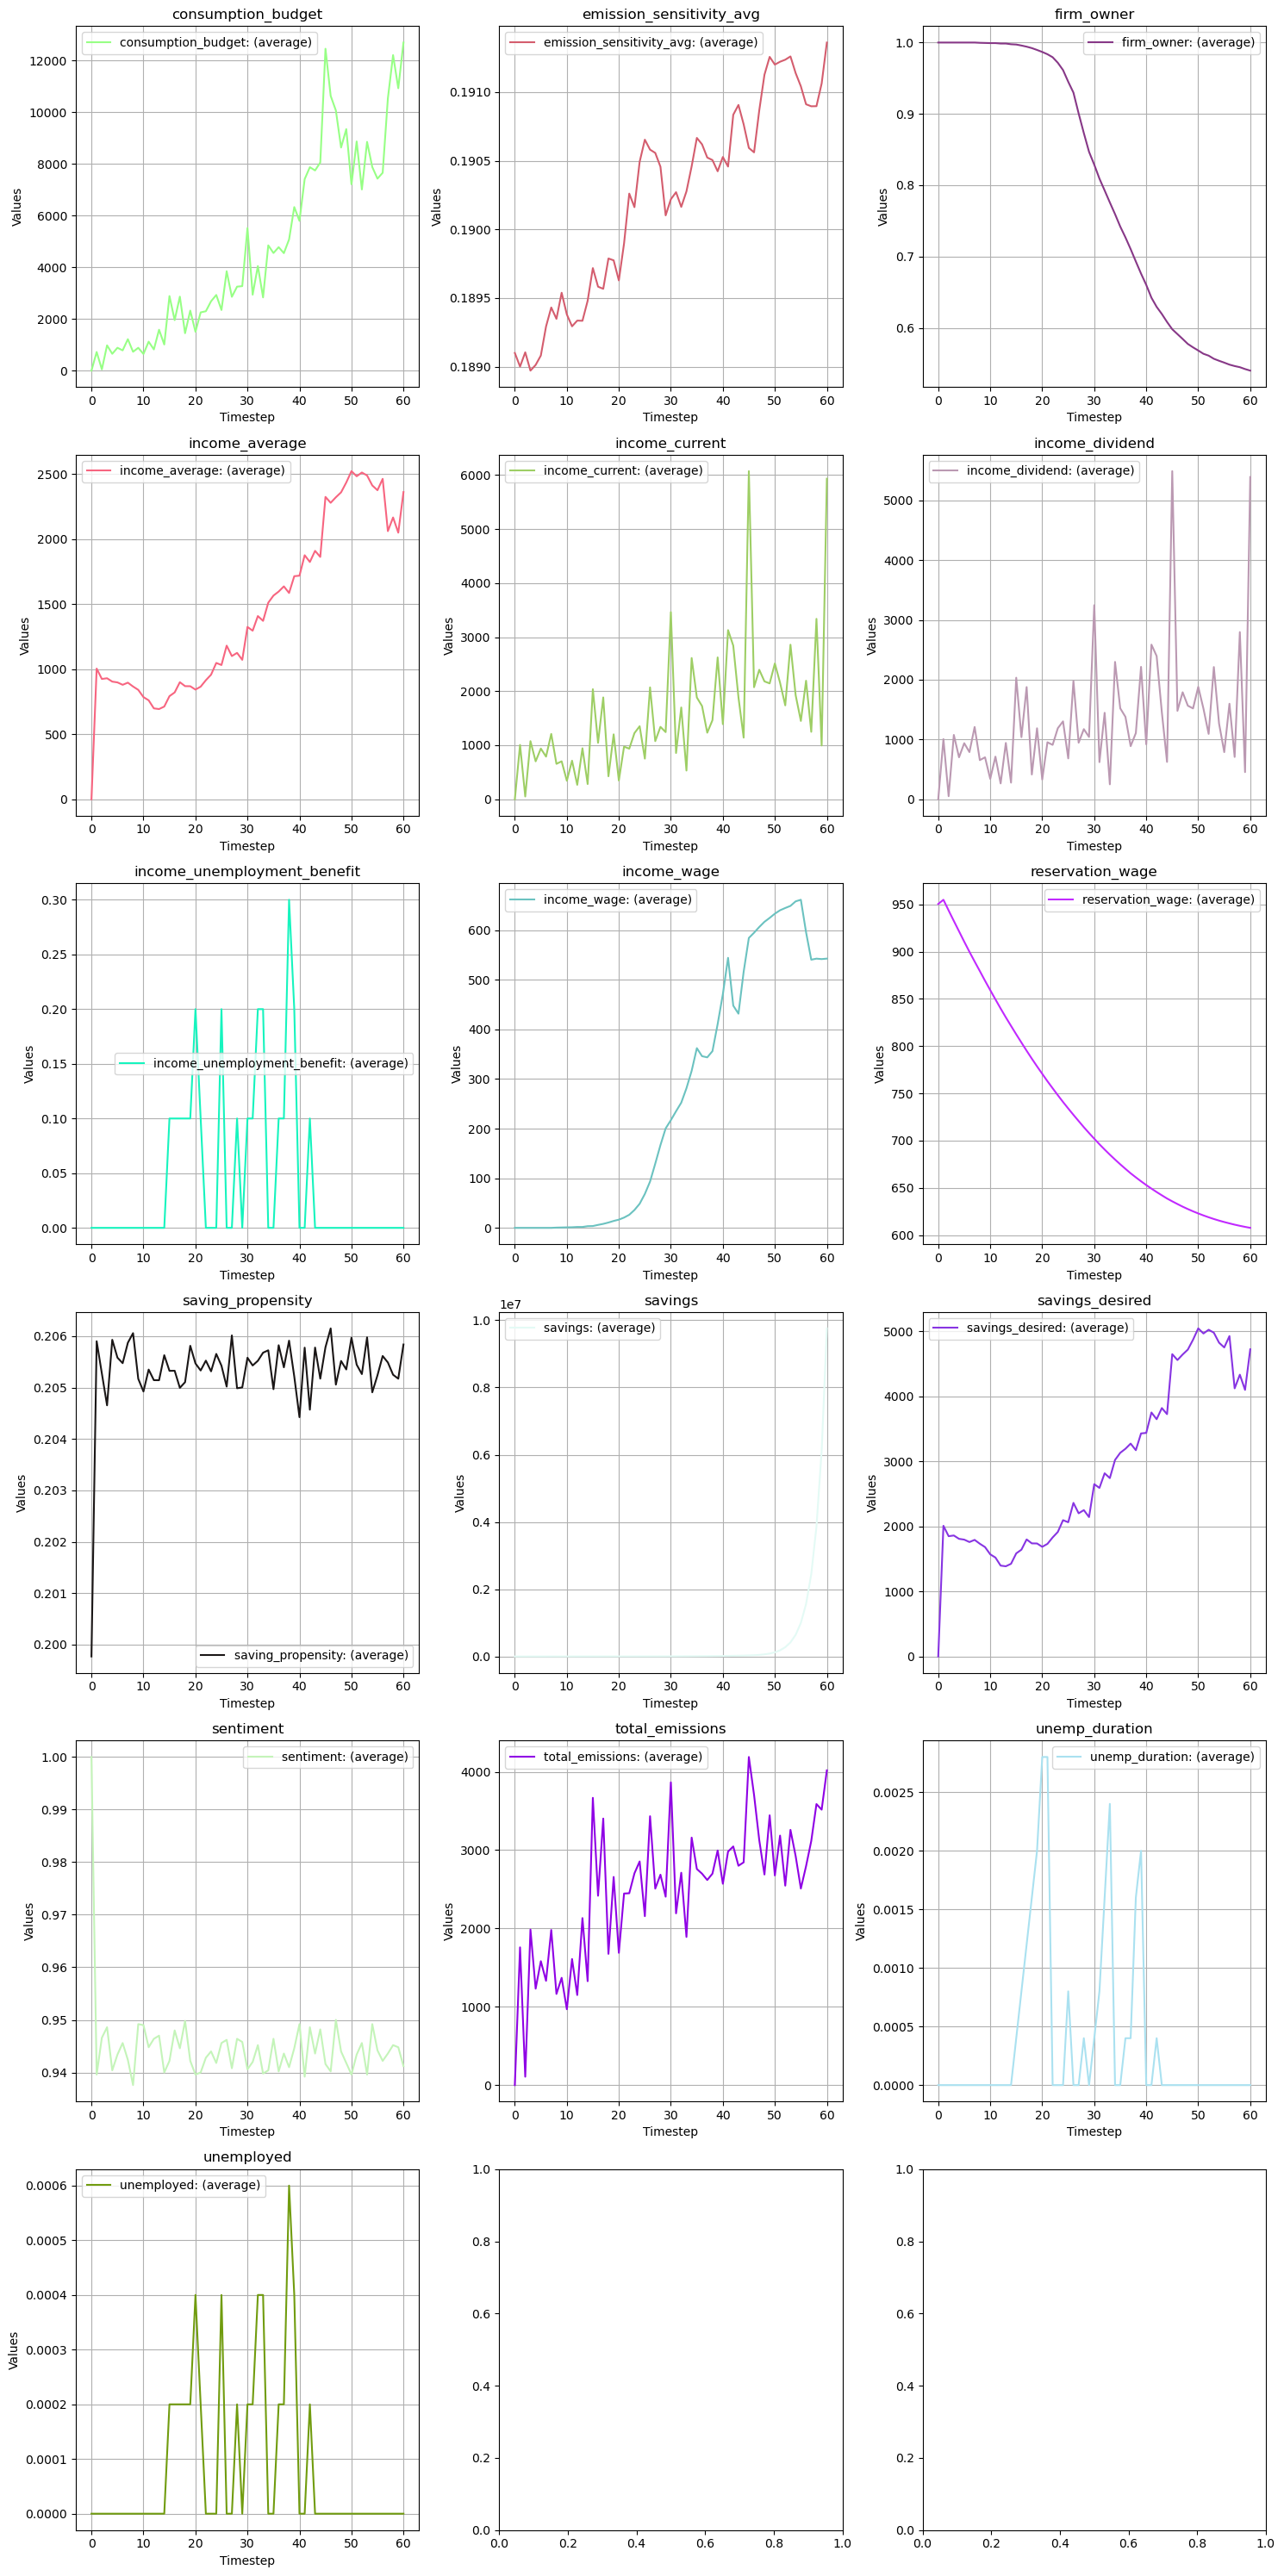

In [34]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_excess_money", "consumption_propensity", 
                   "saving_propensity_optimist", "saving_propensity_pessimist", 
                
                    "unemployed"
                    "unemp_duration_upper_bound", "id"] 
plot_values(households_owners_avg,t,True, cols_to_exclude)

###  Plot firms

In [37]:
cols_to_exclude = ['date', "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic",
                   
                
                    
                    "inventory_reaction_factor", "desired_labor_capacity_utilization", 
                   
                   "id","is_cons_firm"
                   
                   , "bankrupt", "sentiment"
                   ]

#### Plot Consumer Firms

------ Plotting consumer firms -----


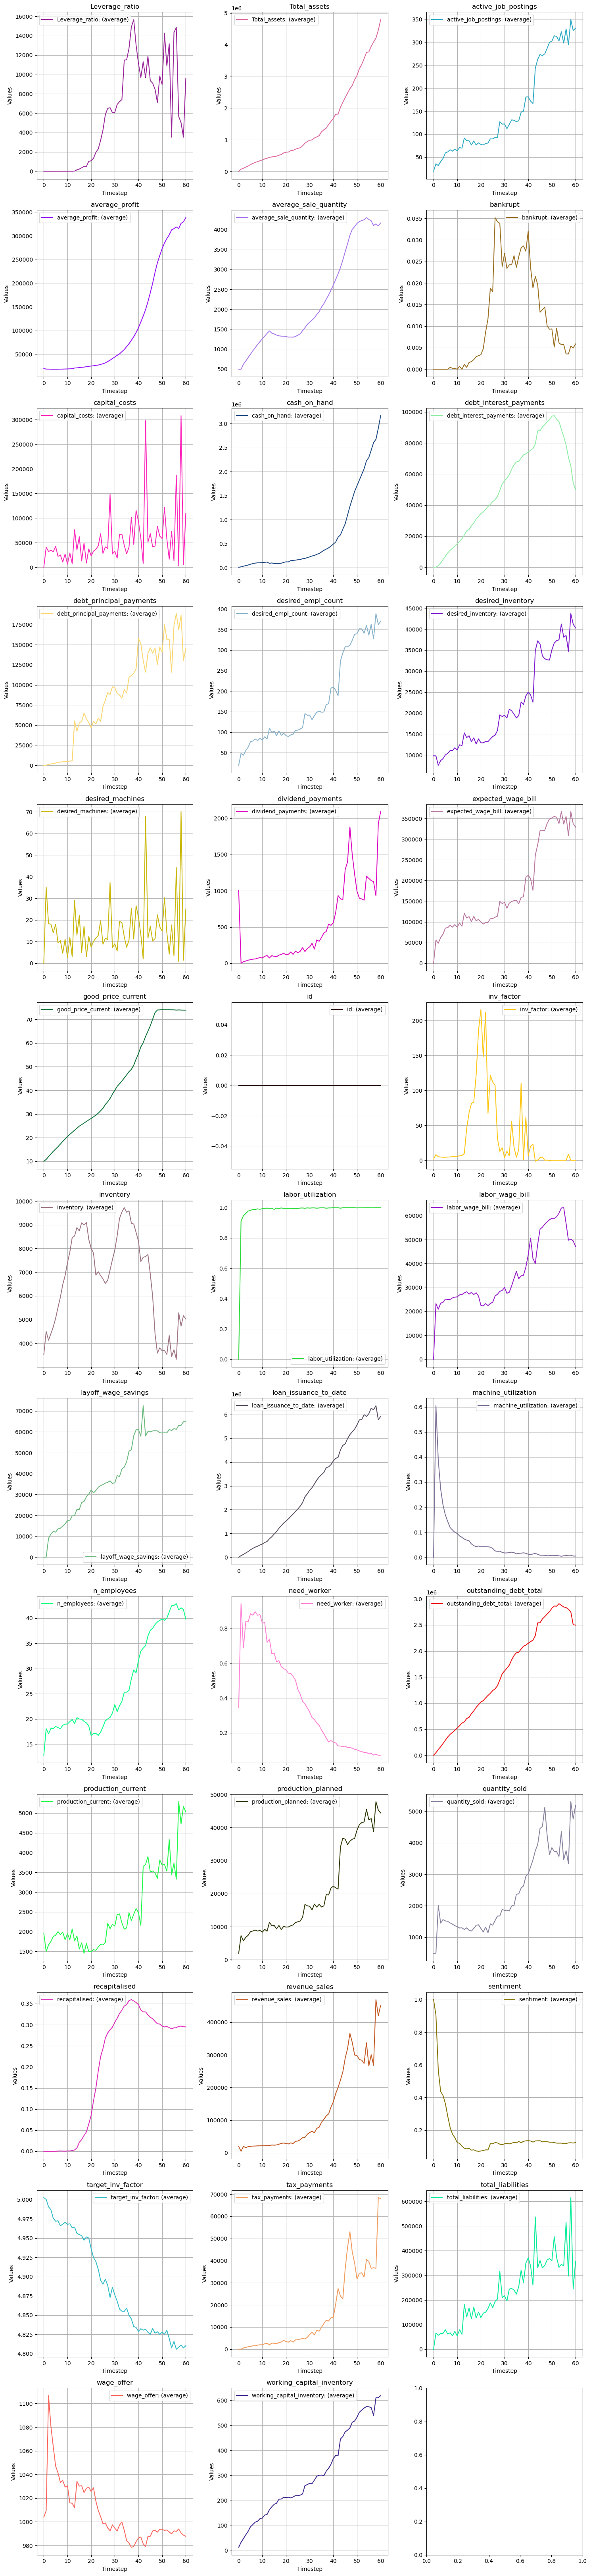

In [39]:
print("------ Plotting consumer firms -----")
#plot_values(cons_firms_sum,t,False, cols_to_exclude)

plot_values(cons_firms_avg,t,True, cols_to_exclude)

### Capital Firms

------ Plotting capital firms -----


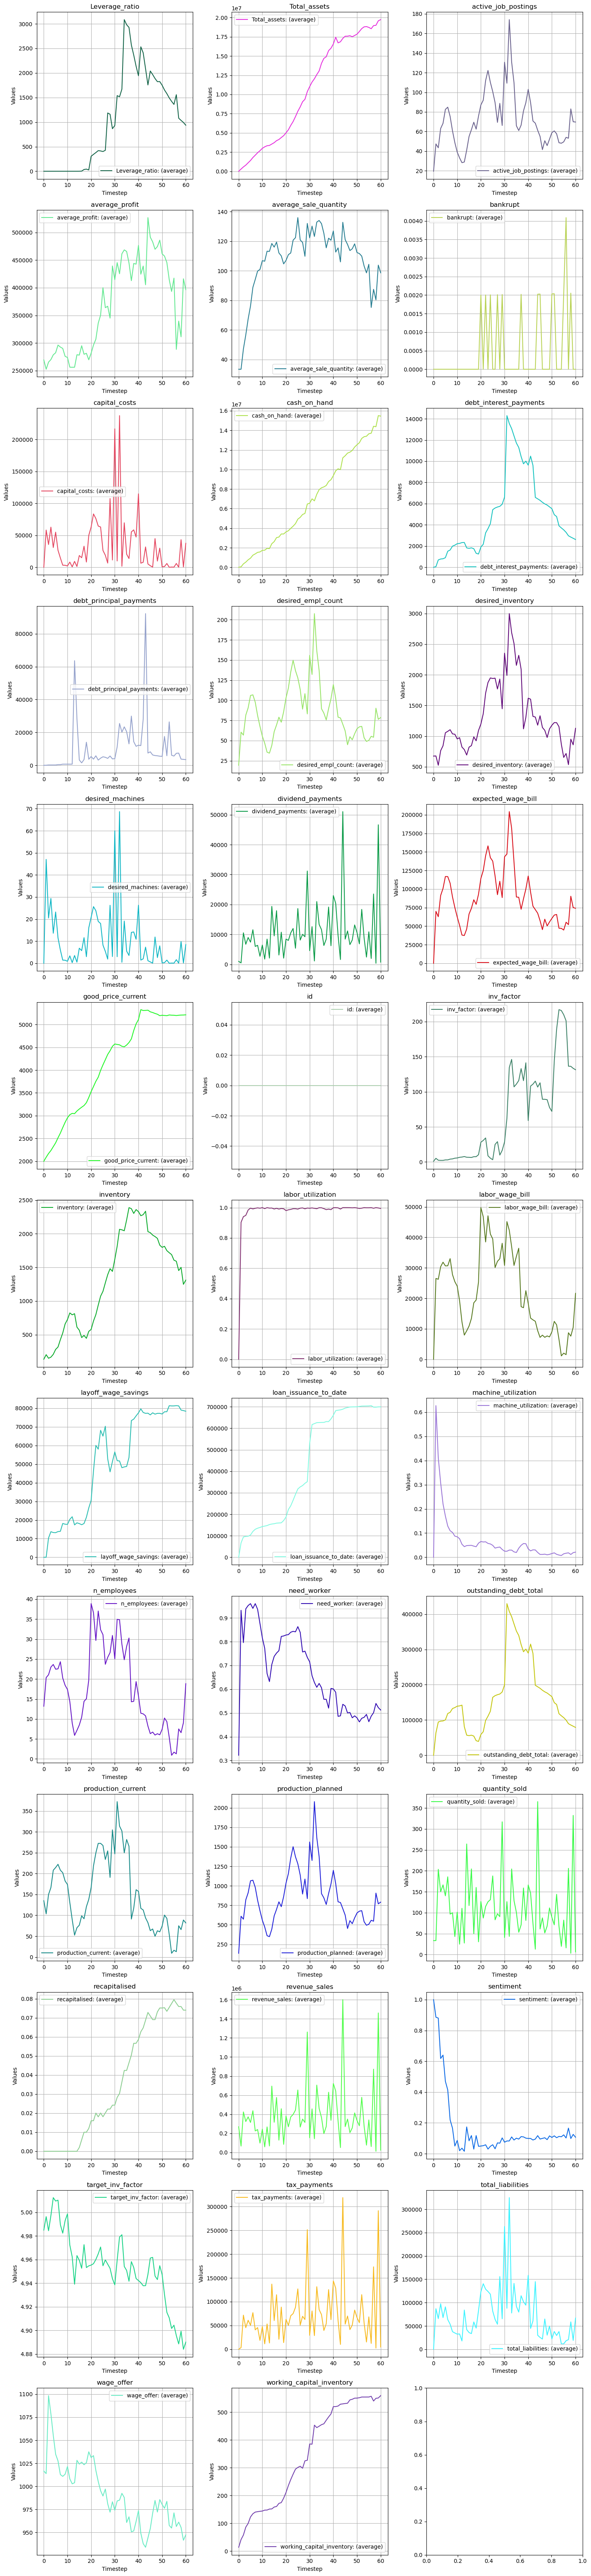

In [40]:
print("------ Plotting capital firms -----")

plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

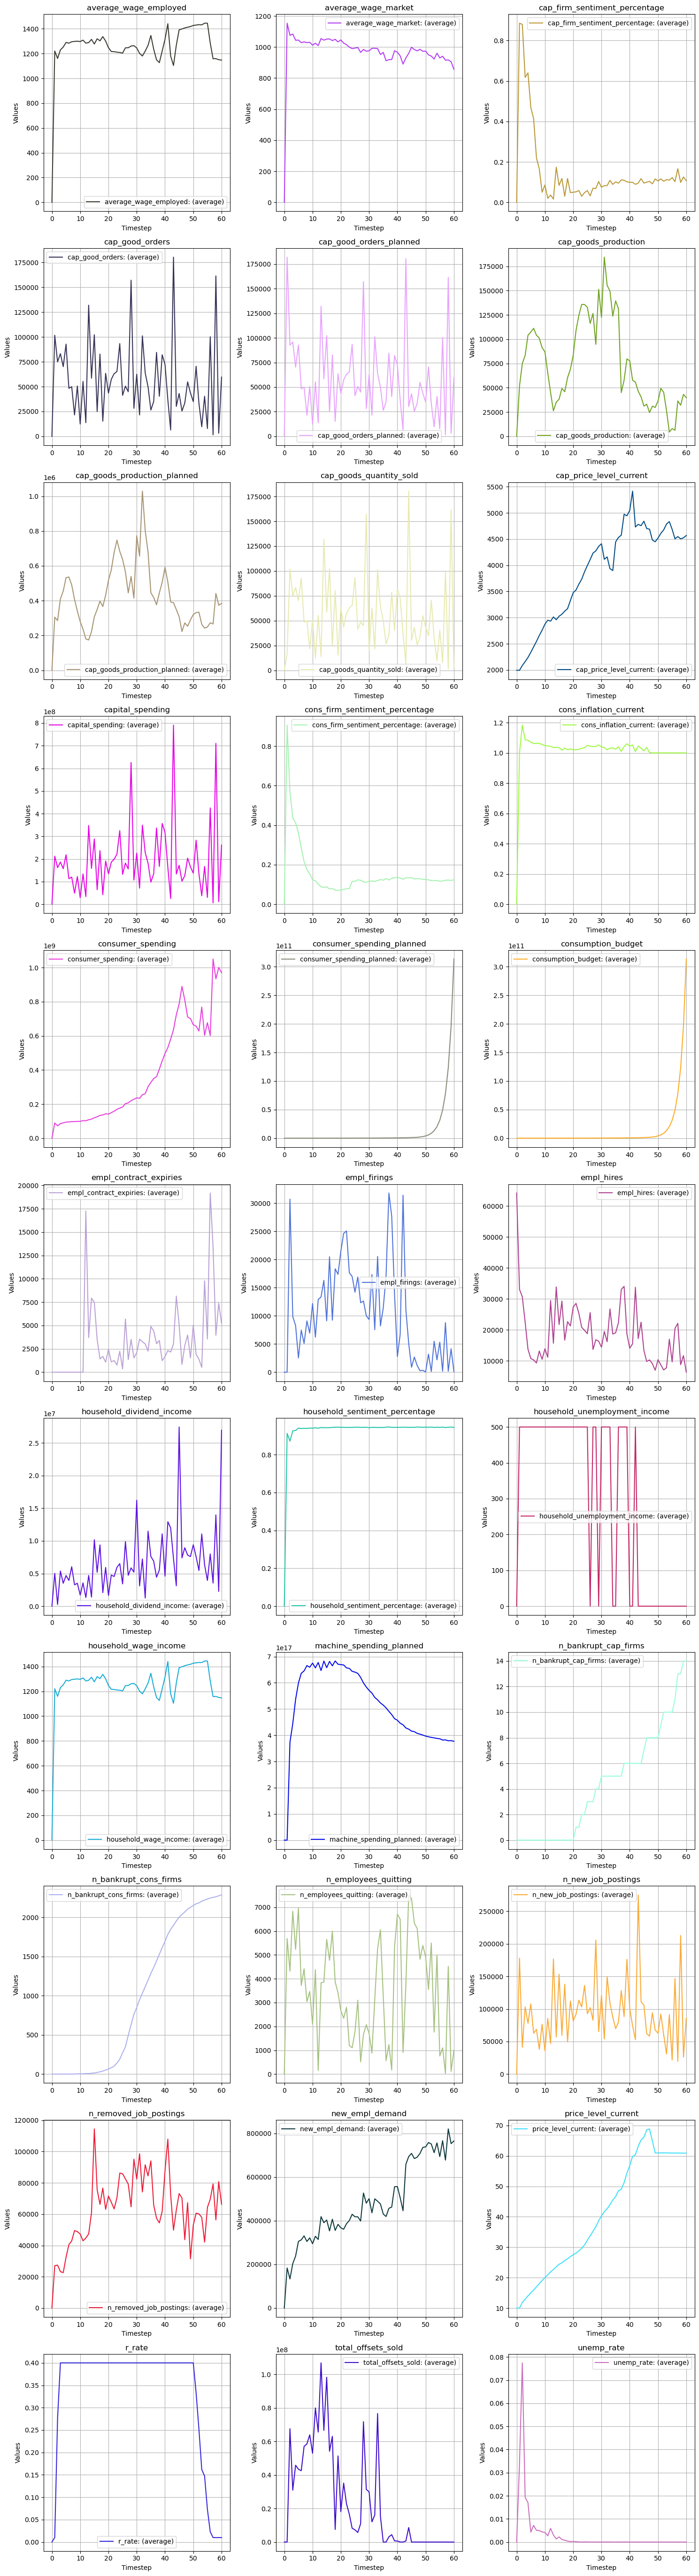

In [52]:
cols_to_exclude = ['date', "price_level_previous","cap_price_level_previous","n_employed", "n_unemployed", 
                   "cap_firm_sentiment_sum", "cons_firm_sentiment_sum", "unempl_benefits", "household_sentiment_sum", "price_level_cons_sector_", 
                
                "actual_spending_on_sector", "inventory_by_sector_", "offsets_sold_by_sector_", "planned_production_on_sector",
                "planned_spending_on_sector", "quantity_sold_by_sector", "total_cons_emissions_by_sector_","actual_production_on_sector",
                "minimum_wage", "emission_offset_price", "total_firm_emissions_by_sector", "total_emission_allowance",
                "id"
                ]
plot_values(pboard,t,True, cols_to_exclude)

# Bank

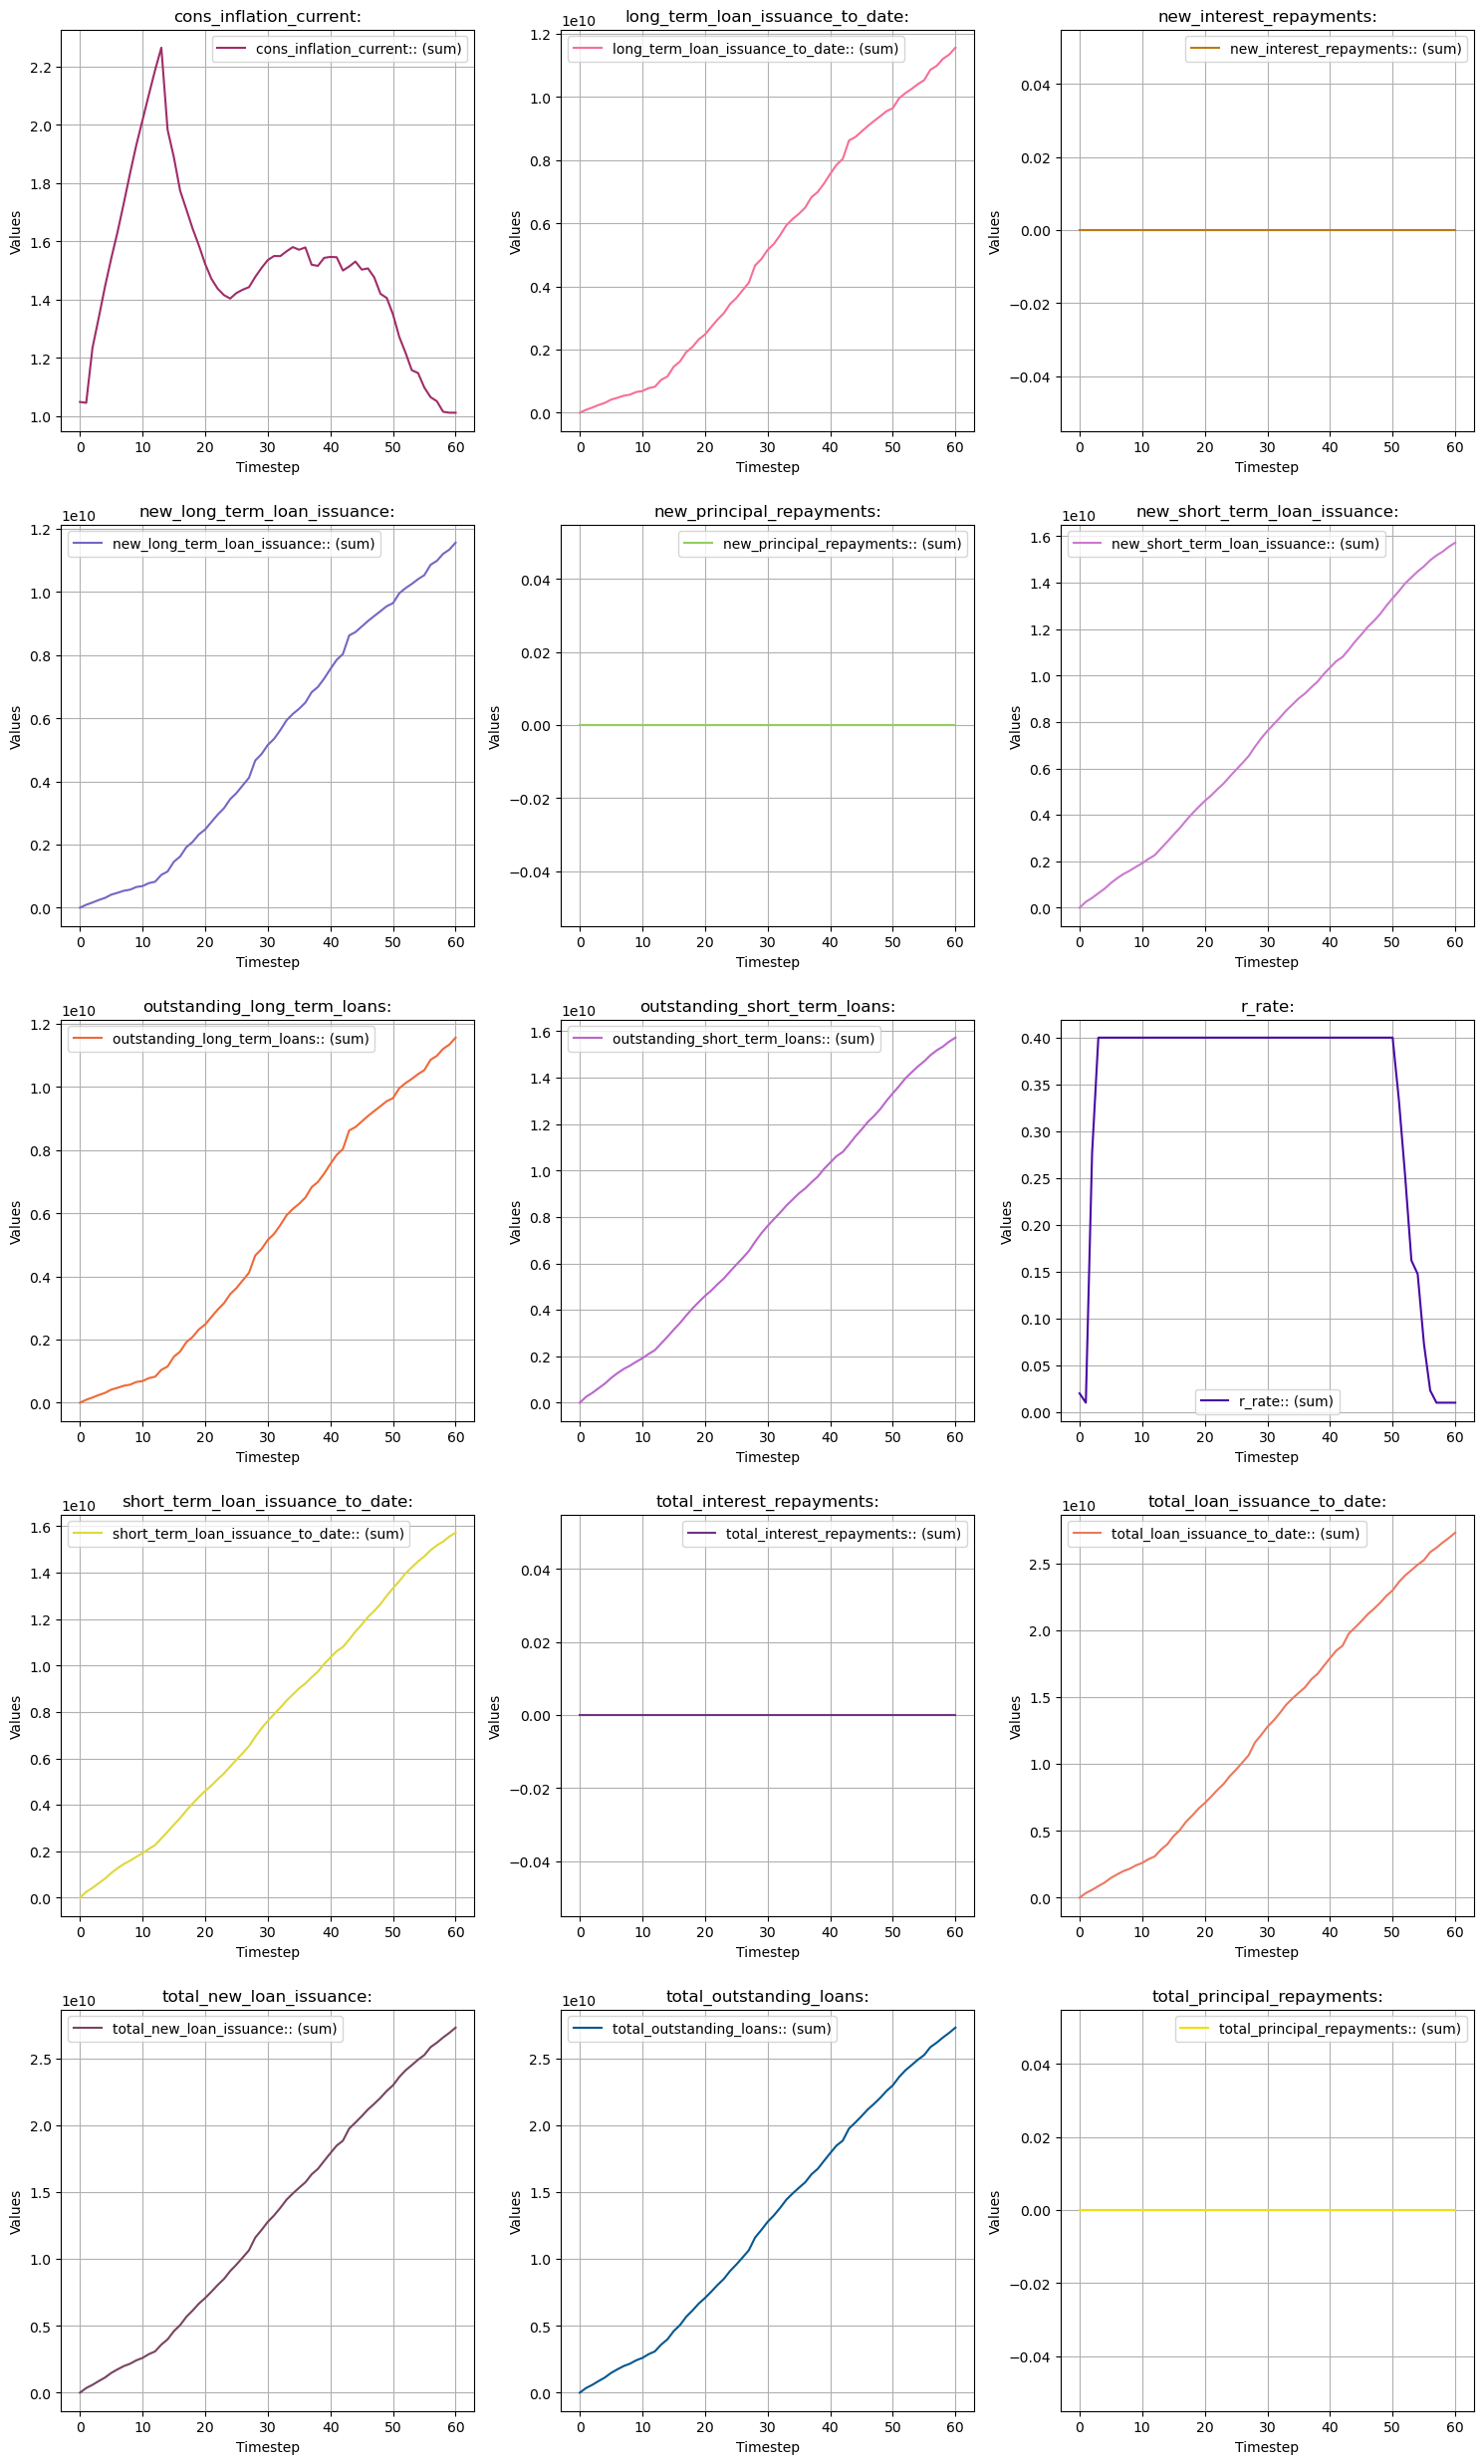

In [42]:
cols_to_exclude = ['date']
plot_values(bank,t,False, cols_to_exclude)

In [48]:
def plot_histogram(df, times, cols):
    if len(times) == 1:
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.hist(df[df['date'] == times[0]][cols[0]], bins=25)
        ax.set_xlabel(cols[0])
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {cols[0]} at t={times[0]}')
        plt.show()
    else:
        fig, axs = plt.subplots(nrows=1, ncols=len(times), figsize=(15, 5))
        for i, time in enumerate(times):
            axs[i].hist(df[df['date'] == time][col], bins=25)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
            axs[i].set_title(f'Distribution of {col} at t={time}')
        plt.tight_layout()
        plt.show()


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


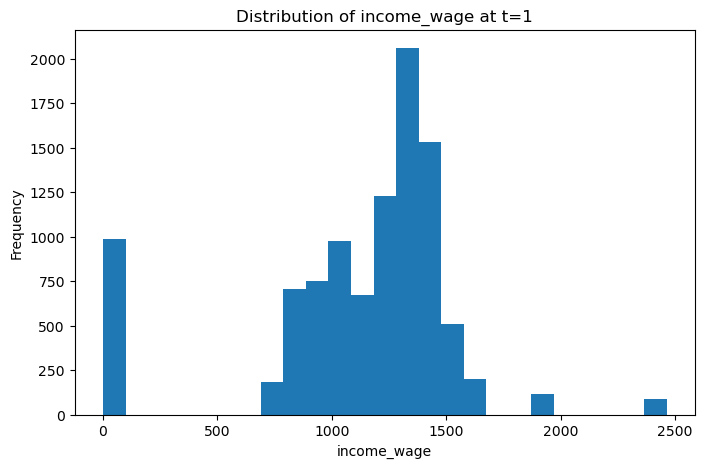

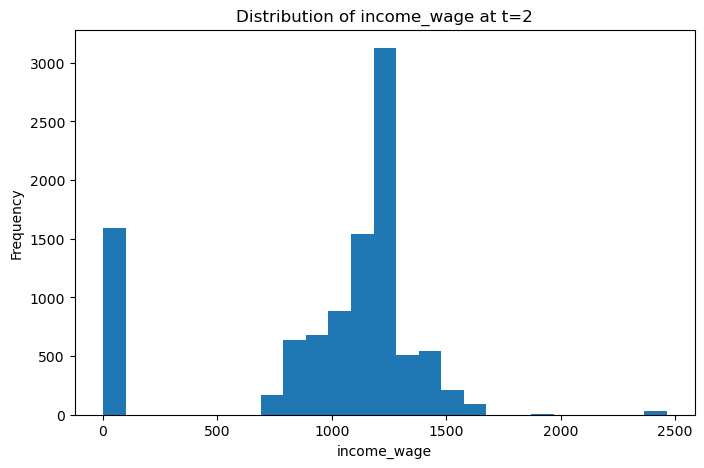

[{'date': 1,
  'mean': 1121.0145,
  'std': 445.11882230068255,
  'min': 0.0,
  'max': 2463.0,
  'uniform_distribution_bounds': (0.0, 2456.3709669020477),
  'normality_p_value': 0.0},
 {'date': 2,
  'mean': 982.9631,
  'std': 462.9895833318716,
  'min': 0.0,
  'max': 2463.0,
  'uniform_distribution_bounds': (0.0, 2371.931849995615),
  'normality_p_value': 0.0}]

In [61]:
analyze_distribution(households, 'income_wage', [1,2])

### Function to plot multiple columns together